<a href="https://colab.research.google.com/github/Imanirakiza/Cardiomegaly-Detection-UIA-Hackathon/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%cd "/content/drive/MyDrive/CardioX/Model"


/content/drive/MyDrive/CardioX/Model


In [4]:
import themodel

themodel.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [5]:
model=themodel.model


In [6]:
model.load_weights("/content/drive/MyDrive/CardioX/Model/cxr_reg_weights.best.h5")
model

1/1 [==============================] - 2s 2s/step


array([[4.2079364e-07, 3.3244844e-12, 2.5710158e-16, ..., 2.9190029e-05,
        6.3809584e-04, 1.5169283e-02],
       [2.9712129e-11, 5.2941601e-20, 4.8787198e-26, ..., 2.7602717e-08,
        3.3534316e-06, 9.2165702e-04],
       [4.5475595e-16, 3.4470144e-27, 8.0005513e-36, ..., 6.0020607e-11,
        4.7919350e-08, 8.3527819e-05],
       ...,
       [4.5432623e-11, 4.9162699e-19, 1.2927729e-24, ..., 1.5090353e-06,
        4.7978221e-05, 4.7697257e-03],
       [1.3261117e-08, 4.2595434e-14, 3.0352470e-18, ..., 6.6302433e-05,
        9.2681748e-04, 2.0809516e-02],
       [7.9717087e-05, 7.6248433e-08, 7.8179313e-10, ..., 8.1718052e-03,
        2.4783008e-02, 1.3865609e-01]], dtype=float32)

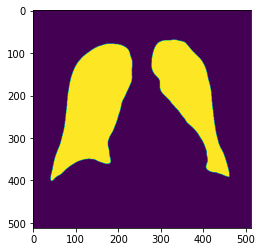

In [9]:
from PIL import Image
import numpy as np
from PIL import Image as im
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (512, 512, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/drive/MyDrive/CardioX/Model/trial.png')
    # '/content/drive/MyDrive/CardioX/Model/CHNCXR_0026_0.png')


pred_img2=model.predict(image)

plt.imshow(np.squeeze(pred_img2))
lung_mask = np.squeeze(pred_img2)
lung_mask
# themodel.model.summary()

## CTR Detector 

In [10]:
import CTR_cal

In [11]:
img = cv2.imread('/content/drive/MyDrive/CardioX/Model/CHNCXR_0026_0_mask.png')

CTR_cal.compute(img)

# result, ctr = CTR_cal.Cardiomegaly_detector(image, lung_mask,2000)

 The CTR is less than 0.5 -0.9465648854961832 No cardiomegaly present.
